# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load Dataset

In [2]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/tyre.zip"
!unzip -qo tyre.zip

--2023-12-02 13:34:43--  https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/tyre.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 16.12.36.95, 52.219.156.87, 52.219.64.12, ...
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|16.12.36.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6245714 (6.0M) [application/x-zip-compressed]
Saving to: ‘tyre.zip’

tyre.zip            100%[===================>]   5.96M  3.06MB/s    in 1.9s    

2023-12-02 13:34:46 (3.06 MB/s) - ‘tyre.zip’ saved [6245714/6245714]



## Preprocess Dataset

In [3]:
data_dir= "./tire-dataset/"

In [4]:
img_height,img_width = 180,180
batch_size = 32

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 900 files belonging to 3 classes.
Using 720 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)


Found 900 files belonging to 3 classes.
Using 180 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['flat', 'full', 'no-tire']


## Preview Dataset

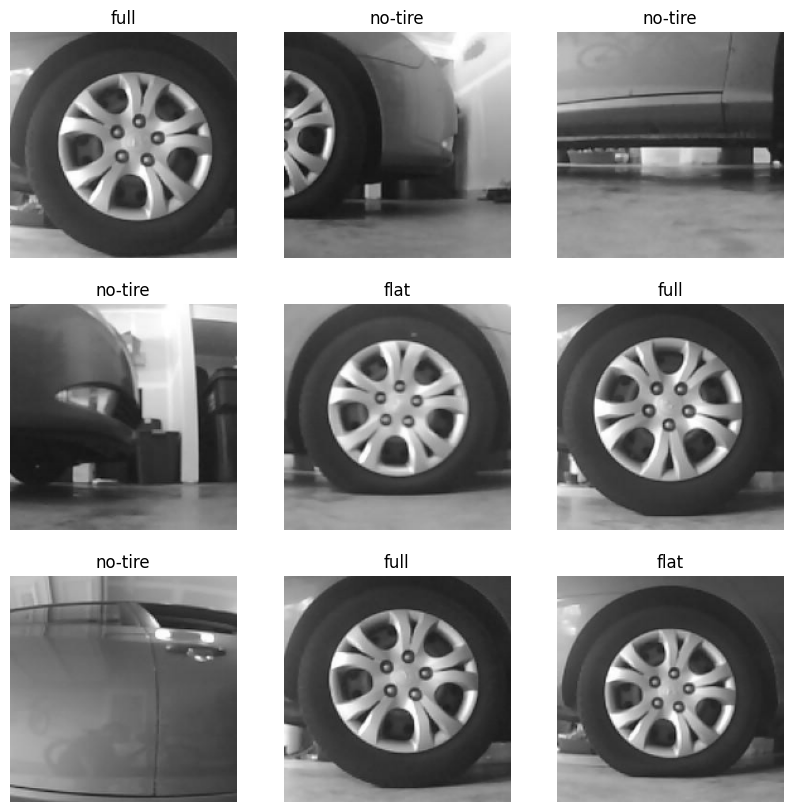

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Model Architecture

In [9]:
num_classes = 3

model = Sequential([
    
    layers.experimental.preprocessing.Rescaling(1./255, input_shape = 
                                                (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')])

In [10]:
model.compile(optimizer = 'RMSprop',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [11]:
epochs = 10
history = model.fit(train_ds,
                    validation_data = val_ds,
                    epochs = epochs)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 15s 604ms/step - loss: 0.8807 - accuracy: 0.6292 - val_loss: 0.6110 - val_accuracy: 0.7444
Epoch 2/10
23/23 [==============================] - 14s 620ms/step - loss: 0.4617 - accuracy: 0.7944 - val_loss: 0.3319 - val_accuracy: 0.9222
Epoch 3/10
23/23 [==============================] - 14s 608ms/step - loss: 0.2611 - accuracy: 0.8833 - val_loss: 0.1497 - val_accuracy: 0.9500
Epoch 4/10
23/23 [==============================] - 13s 569ms/step - loss: 0.2002 - accuracy: 0.9431 - val_loss: 0.0797 - val_accuracy: 0.9778
Epoch 5/10
23/23 [==============================] - 14s 588ms/step - loss: 0.1161 - accuracy: 0.9681 - val_loss: 0.1305 - val_accuracy: 0.9500
Epoch 6/10
23/23 [==============================] - 13s 583ms/step - loss: 0.0669 - accuracy: 0.9847 - val_loss: 0.0856 - val_accuracy: 0.9667
Epoch 7/10
23/23 [==============================] - 14s 622ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.0446 - val_accuracy: 0.9833
Epoch 8/10

## Plot Accuracy and Loss

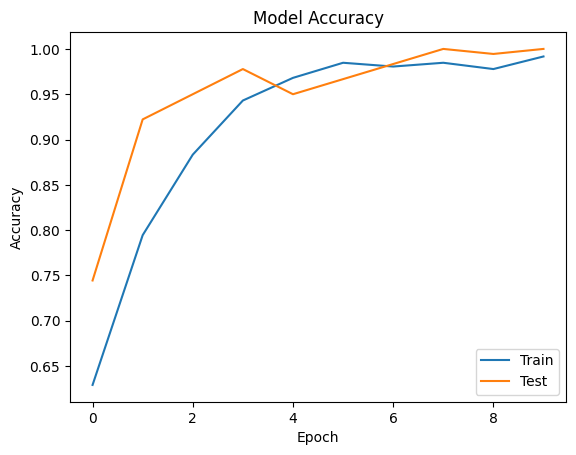

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc = "lower right");

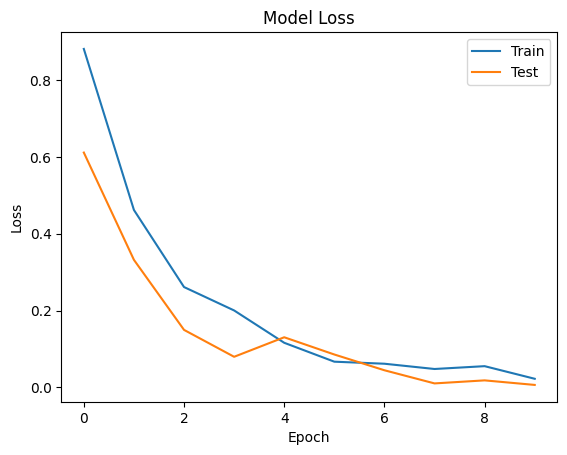

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'], loc = 'upper right');

## Predict Dataset

In [14]:
tyre = ["Flat Tyre: Dah boleh isi angin lah",
        "Full Tyre: Selamat memandu awak-awak semua",
        "No Tyre: Nuh-uh, ni bukan gambar tayar"]

def Single_Image_Prediction(file):
    image = file
    plt.imshow(image,cmap = 'gray')
    plt.show()
    print(image.shape)
    img_arr = img_to_array(image)
    np_image = np.expand_dims(img_arr, axis = 0)
    return np_image

In [15]:
from tensorflow.keras.preprocessing import image as img_module

1/1 [==============================] - 0s 151ms/step


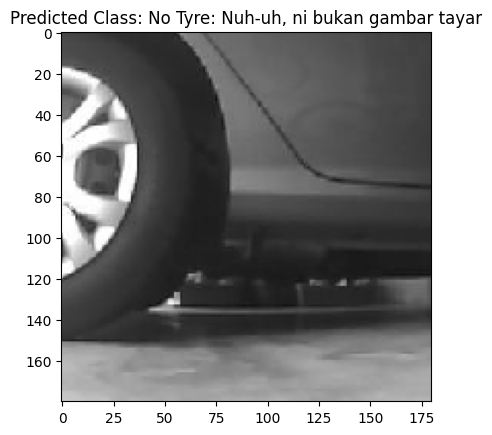

In [16]:
test_image_path = '/kaggle/working/tire-dataset/no-tire/00134.jpg'

img = img_module.load_img(test_image_path, target_size=(img_height, img_width))
img_array = img_module.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  

pred_value = model.predict(img_array)
index_value = np.argmax(pred_value, axis=1)

plt.imshow(img_array[0].numpy().astype(np.uint8)) 
plt.title(f'Predicted Class: {tyre[index_value[0]]}')
plt.show()

1/1 [==============================] - 0s 35ms/step


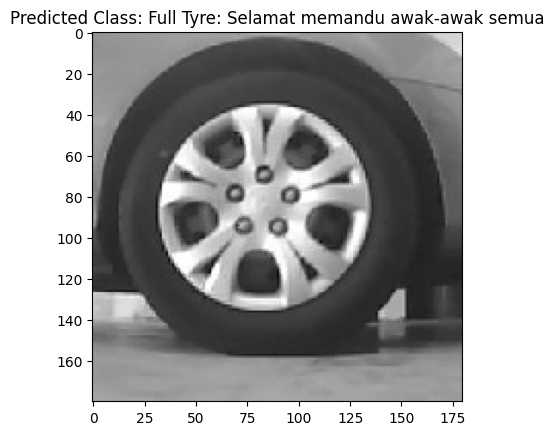

In [17]:
test_image_path = '/kaggle/working/tire-dataset/full/00134.jpg'

img = img_module.load_img(test_image_path, target_size=(img_height, img_width))
img_array = img_module.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  

pred_value = model.predict(img_array)
index_value = np.argmax(pred_value, axis=1)

plt.imshow(img_array[0].numpy().astype(np.uint8)) 
plt.title(f'Predicted Class: {tyre[index_value[0]]}')
plt.show()

1/1 [==============================] - 0s 35ms/step


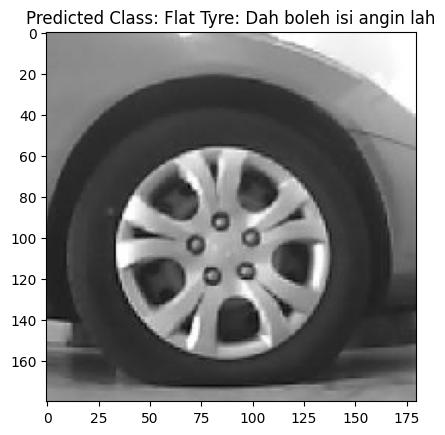

In [18]:
test_image_path = '/kaggle/working/tire-dataset/flat/00134.jpg'

img = img_module.load_img(test_image_path, target_size=(img_height, img_width))
img_array = img_module.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  

pred_value = model.predict(img_array)
index_value = np.argmax(pred_value, axis=1)

plt.imshow(img_array[0].numpy().astype(np.uint8)) 
plt.title(f'Predicted Class: {tyre[index_value[0]]}')
plt.show()

## Save Model

In [19]:
#model.save('TyrePressurePredictor.keras')